In [1]:
%matplotlib inline
%run setup_colonysize_analysis
%run setup_suppression_analysis
%run setup_complex_analysis
%run setup_qtl_analysis
import warnings
warnings.filterwarnings('ignore')

## 1. Measuring suppression by standing variation
We set out to test mutation effects in diverse yeast isolates from various geographic locations and sources (“wild yeasts”). To do so, we used the Synthetic Genetic Array approach  to cross a collection of 1,499 essential gene temperature sensitive alleles (“TS alleles”) of 673 query genes in the laboratory strain S288C into 10 stable haploid wild yeasts, as well as into the S288C control as a reference. 

We first measured the growth defect of each TS allele in the wild yeast strains in two independent biological replicates (Table S1, Figure S1). After filtering out 379 temperature insensitive strains at 34 °C, we were left with 1106 TS alleles of 580 query genes. We estimated suppression as normalised log2-scale growth difference between the wild and reference strain crosses at the restrictive temperature, and considered a TS allele phenotype suppressed, if this value was above 0.75, i.e. the wild strain segregants had a 1.68-fold improvement in growth, and if this was unlikely due to chance (false discovery rate = 0.012, Methods, Figure 2A, Table S2). 


In [2]:
create_combined_colonysize_data(max_sd=1.0) # screen_data/*/* => paper/tables/combined

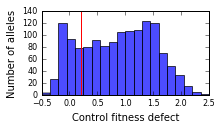

In [3]:
create_suppression_values(ts_cutoff=0.2, do_rep_mean_plot=False) # paper/screen_colony_size/combined => combined fitness; suppression
plot_detailed_ref_ts(ts_cutoff=0.2) # visualise what the 0.2 cutoff for calling a strain to be temperature sensitive looks like, then create suppression values

Strains: 1474 with [some] fitnesses: 1458 with [some] suppression: 1398
Strains with suppression values: 1398 for 647 genes (76 bad or irreproducible).
chrXVI translocation: 68, chrVIII: 44, non-TS: 292
TS strains: 1106 for 580 genes
TS strains, no chrXVI: 1053 for 564 genes


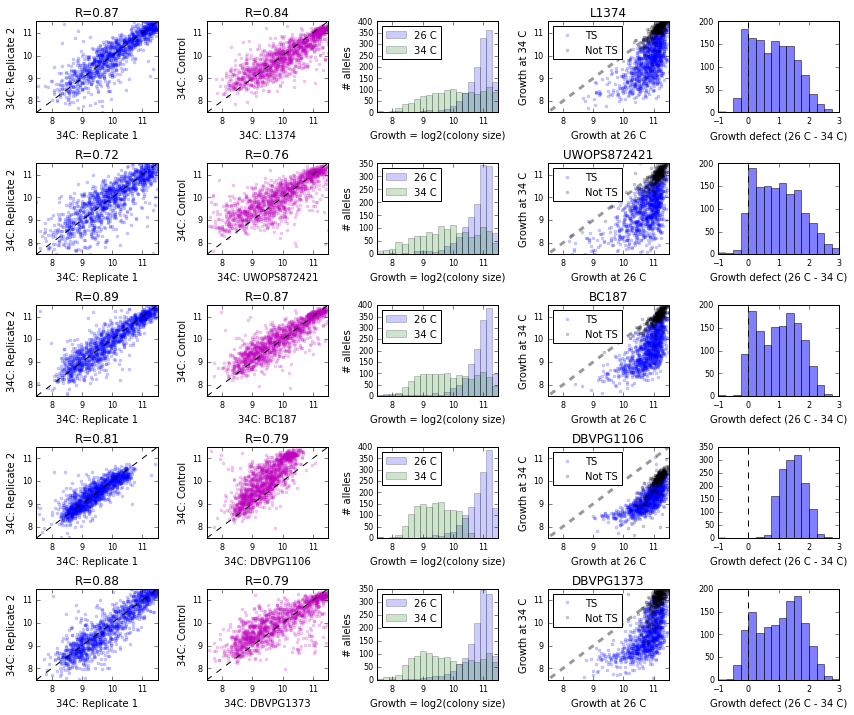

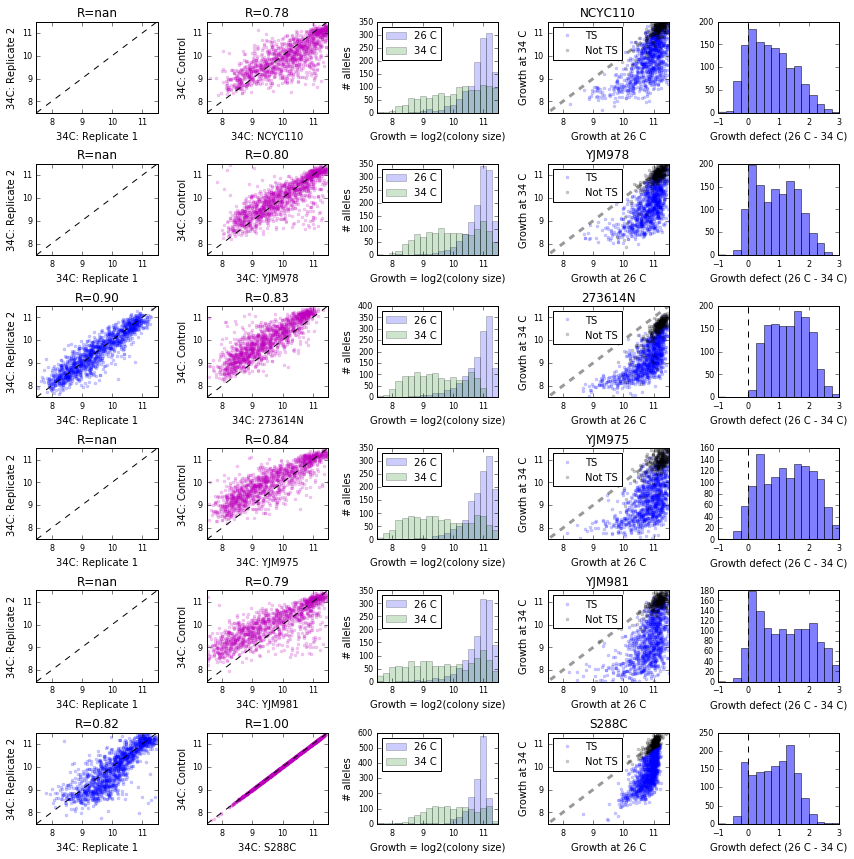

In [4]:
print_strain_stats()
plot_fitnesses()

### 1.1 Positive controls
Our screen included several positive control crosses that were expected to show suppression. Three of the wild strains harbor a chrVIII-chrXVI inversion (Figure S2A). Crossing these strains to the reference strain results in 25% of the progeny carrying a duplication of a substantial part of the left arm of chromosome XVI (Figure S2B). Reassuringly, we confirmed that the extra copy of the essential gene suppressed 35 out of 53 TS alleles in the duplicated region on average, while the other wild strains suppressed a median of 2 (Figure 2B). Further, the extra copy of chromosome VIII carried by the NCYC110 strain resulted in a similar pattern of suppression (Figure S3A-C). 

No translocation: 2 of 53 of measured alleles suppressed on chrXVI across strains on average, 3 leniently
With translocation 35 of 53 of measured alleles suppressed on chrXVI across strains on average, 43 leniently


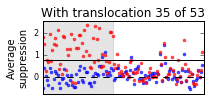

In [5]:
plot_allele_supp_genomic_xvi()

### 1.2 Global structure 
Next, we asked whether segregant progeny from genetically similar wild strains were more likely to suppress the same TS alleles compared to more diverse strains. Indeed, suppression patterns were more distinct for the two strains genetically furthest from the wine/European cluster (maximum Pearson’s R to any other strain for NCYC110, UWOPS87-2421 less than 0.52, and between 0.64 and 0.73 for the rest), and were consistent with the genetic relatedness otherwise (Fig 2B). When using different wild strains as the phenotypic reference to call suppression, the total number of suppressed TS alleles was lower compared to S288C, but their frequency across strains was similar (Appendix Fig S2). This suppression pattern is consistent with the reference strain acquiring additional loss-of-function mutations in the laboratory that can be suppressed by crossing to the wild strains, as well as additional events that are linked to distances in both genetic and phenotypic trees.

Max and Average correlation to others:
	Y14278: 0.455	0.374
	Y14274: 0.513	0.434
	Y14276: 0.637	0.444
	Y14280: 0.650	0.549
	Y14281: 0.729	0.586
	Y14273: 0.714	0.575
	Y14275: 0.670	0.559
	Y14277: 0.674	0.548
	Y14279: 0.729	0.607
	Y14282: 0.652	0.519


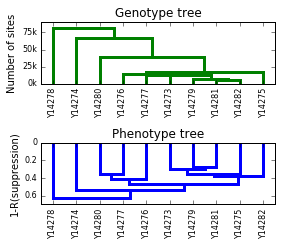

In [6]:
plot_trees()
print_paper_max_suppression_profile_corrs()

Ref.   R=1.00 N=338 med=79 Per strain: [ 81 125  56  80  50 125  62  50  79  84]
Y14276 R=0.95 N=311 med=88 Per strain: [ 91. 136.  78.  nan  41. 137.  82.  40.  88. 102.]
Y14278 R=0.89 N=245 med=67 Per strain: [ 69. 111.  44.  83.  53.  nan  45.  63.  67.  68.]
Y14274 R=0.84 N=273 med=64 Per strain: [ 64.  nan  60. 104.  57. 138.  56.  65.  60.  72.]
Y14277 R=0.94 N=296 med=54 Per strain: [ 54. 105.  44.  71.  nan 137.  38.  28.  42.  63.]
Y14280 R=0.97 N=276 med=51 Per strain: [ 51. 102.  43.  42.  23. 105.  37.  nan  59.  65.]
Y14281 R=0.86 N=254 med=25 Per strain: [ 25.  69.  25.  72.  16. 112.  20.  22.  nan  43.]
Y14273 R=0.90 N=240 med=37 Per strain: [nan 77. 29. 50. 37. 94. 21. 21. 23. 45.]
Y14275 R=0.95 N=256 med=32 Per strain: [29. 79. nan 49. 21. 90. 22. 18. 32. 38.]
Y14282 R=0.83 N=236 med=28 Per strain: [28. 77. 24. 77. 17. 98. 19. 30. 20. nan]
Y14279 R=0.88 N=228 med=23 Per strain: [17. 68. 23. 47.  9. 92. nan 21. 19. 35.]


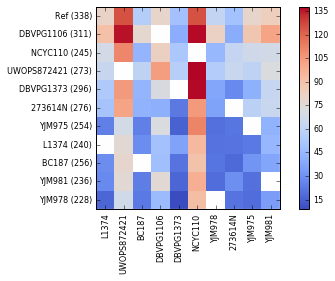

In [7]:
print_reference_dependence(s_cutoff=0.75, z_cutoff=0)

### 1.3 Allele suppression overview 
Also beyond these large genomic determinants, suppression of fitness defects by standing variation in the species was relatively common. Overall, 192 of remaining 1,106 TS alleles (17%, excluding copy number suppressed alleles discussed above) and 149 of the 580 tested genes (26%) were suppressed in segregant progeny from at least one genetic background, and on average wild strain progeny could suppress 37 essential gene mutant alleles (3%). Due to variation in temperature sensitivity, different TS alleles of the same gene are not necessarily expected to show suppression at the same temperature. Nevertheless, if a TS allele was suppressed in segregant progeny from a wild strain, the strongest suppression of another TS allele of the same gene in segregants of the same wild strain was on average substantially higher than expected by chance (0.61 vs 0.39, Appendix Figure S2). 


In [8]:
%run setup_suppression_analysis.py
print_allele_summaries(s_cutoff=0.75, z_cutoff=4.5)
print 
print_replicate_count_impact()

Suppression at s > 0.75, z > 4.5 (Bonferroni p after correcting for 10554 tests=3.59e-02; nominal 3.40e-06)
Alleles:
	All tests: 397/10554 (0.038)
	Any strain: 192/1106 (0.17)
	Median per strain: 37 (0.03)
Genes:
	All tests: 352/5611 (0.063)
	Any strain: 149/580 (0.26)
	Median per strain: 35

One rep: ['Y14279' 'Y14281' 'Y14282'] Two reps: ['Y14273' 'Y14275' 'Y14277']
1 reps: 75.0 alleles s>0.75 on average, 36.3 also z>4.5
2 reps: 62.3 alleles s>0.75 on average, 34.7 also z>4.5
657/1073 means of two reps more variable than one




[If] a TS allele was suppressed in segregant progeny from a wild strain, the strongest suppression of another TS allele of the same gene in segregants of the same wild strain was on average substantially higher than expected by chance (0.61 vs 0.39, Appendix Figure S2). 

...

The patterns of suppression of the same TS allele or gene in the various wild strain crosses were diverse. In 31% of the cases, the TS allele is possibly temperature sensitive only in the reference background, with suppression in segregant progeny of most of the different tested wild strains (61 of 191 TS alleles with suppression at a lower 0.5 threshold, e.g. TS alleles of GAB1, Figs 2C-D).

Any allele+strain: 0.06
Strongest strain per allele: 0.18
Strongest strain per allele (>1 allele): 0.39
Given suppression of one allele by a strain, strongest other allele of same gene for same strain : 0.61
Of 192 suppressed alleles, 61 (31%) have at least 6 wild strains suppressing at 0.50


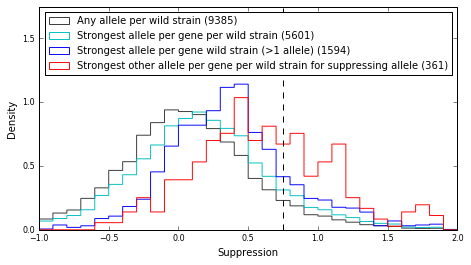

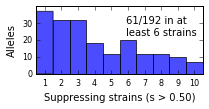

In [9]:
%run setup_suppression_analysis.py
print_paper_gene_concordance()
print_paper_s288c_only(s288c_cutoff=0.5)

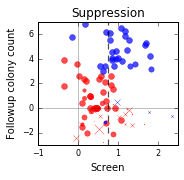

In [10]:
plot_followup_suppression()
write_suppression_values_followup()

Suppressed genes: 0.137 deleterious mutations on average; restricted:0.156


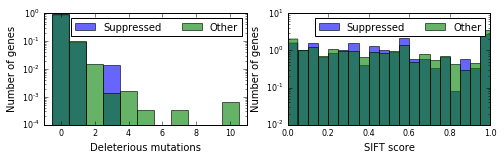

In [11]:
plot_sift()

### 1.4 Patterns of suppression
The patterns of suppression for different alleles of the same gene in the various wild strains were diverse. In some cases, the gene is possibly essential only in the reference background, with multiple alleles showing suppression in all the different tested strains, while for other genes, suppression was limited to a few wild strains (e.g. GAB1 and NSE4 genes, respectively, Figure 2D). Suppression was also shared across genes with related function. For example, Gab1 is a member of the GPI-anchor transamidase complex, mutations to all four screened members of which were strongly suppressed (Figure 2E), and the GPI8 gene with less suppression was likely carrying the suppressor variant (see below). Again, we also observed suppression in specific backgrounds, e.g. mutations to genes in the nuclear condensin complex were suppressed almost exclusively in the UWOPS87-2421 background. 

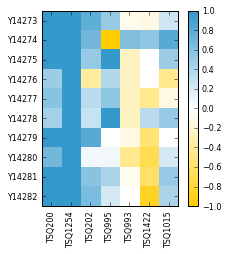

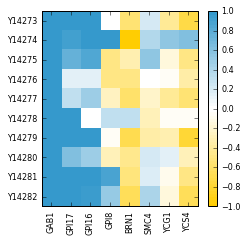

In [12]:
plot_paper_allele_suppression_examples(outfilename="2E_suppression_example.svg", vmi=-1, vma=1)
plot_paper_gene_suppression_examples(genes=("YLR459W","YDR434W","YHR188C","YLR088W", "YDR331W","YBL097W",
                                            "YLR086W", "YDR325W","YFR031C","YLR272C"), outfilename="2F_gpi_condensin.svg", vmi=-1, vma=1)

### 1.5 Complex enrichment
 In general, we observed consistent suppression patterns between genes encoding members of the same protein complex most frequently (18% of protein complexes with average between-gene suppression correlation higher than permuted controls, Methods), followed by KEGG pathways (15%) broad functional categories (10%), cellular locations (10%), and Gene Ontology categories (3%). 

In [13]:
print_paper_complex_enrichments(fdr=0.25, effect=0.25, do_print=False, rerun=False)

EBI: correlation of values across gene set	0.18 (14 of 76 at FDR=0.25)
CoLoc: correlation of values across gene set	0.10 (1 of 10 at FDR=0.25)
KEGG: correlation of values across gene set	0.15 (6 of 39 at FDR=0.25)
FunCats: correlation of values across gene set	0.10 (3 of 30 at FDR=0.25)
GO slim: correlation of values across gene set	0.03 (4 of 148 at FDR=0.25)


## 2. Mapping of genomic regions involved in suppression

To map the suppressor loci, we performed bulk segregant analysis on 38 segregating TS allele populations at both 26°C (TS allele functional) and 34°C (TS allele loss-of-function, Fig 1B) (Liti & Louis, 2012). We sequenced the populations, and compared variant allele frequencies between the two temperatures (Dataset EV4 and EV5). We first considered positive controls expected to involve suppression by an additional, wild-type copy of the query gene described above, either generated by the chrVIII-chrXVI translocation (6 samples) or located on an aneuploid chromosome (6 samples). In all 12 cases, we could indeed observe selection for either the translocation or the aneuploidy, and further confirmed that suppression occurred by the presence of a second, wild-type allele of the query gene (Figs EV1C-D and EV2D). 

Second, we sequenced meiotic progeny of nine crosses that showed weak “suppression” in our screen (suppression score below 0.7), unrelated to any known translocations or aneuploidies. Five cases showed selection for newly acquired aneuploidies of either the chromosome carrying the query gene or other loci selected in the crossing protocol. These cases often represent ways of cells to escape the strong selection applied in our protocol, rather than true cases of suppression. The remaining four cases harboured regions of selection for the wild strain sequence specific to high temperature (Dataset EV4 and EV5), suggesting that some of the weaker scores in our screen also represent true cases of suppression, and corroborating the observations from the confirmation of individual suppression effects. 

Third, we analysed 17 crosses that showed strong suppression in our screen (suppression score above 0.75). The large majority (14) showed regions of specific selection for the wild sequence at high temperature (Fig 3A, Datasets EV4 and EV5), whereas two populations diploidised or showed selection for an aneuploidy. The one remaining cross did not show any suppressor loci or aneuploidies. Thus, we could map suppressor loci for 14/17 (82%) of the crosses that showed strong suppression in our screen, and in 4/9 (44%) of the crosses that showed weak suppression.


19 good crosses; 31 strong QTLs [1.63 average]; 48 weak QTLs [2.53 average]
Of strong QTLs, 27 towards wild [0.87 of all]; of weak ones 29 towards wild [0.60 of all]


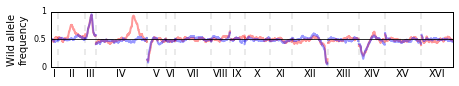

In [14]:
#call_afs(do_run=True) # make VCF files and dataset D4
%run io_tools
%run setup_qtl_analysis
%matplotlib inline
calc_sequencing_qc_metrics()
paper_call_qtls()
plot_example_qtl_map()
print_paper_qtl_stats()

### 2.1 Suppressor maps

The landscape of suppressors is diverse. We identified 31 suppressor loci in the 19 crosses without aneuploidies (1.6 on average, Figures 3B and 4A, Table S5), and an additional 48 weaker reproducible signals (2.5 on average, Figures 3C and 4A, Table S5). This number of modifier loci is consistent with our estimates based on segregation patterns observed after tetrad dissection (Figure S4). Most of the suppressor loci (27/31) were selected for the non-reference sequence, consistent with the additional variation in species providing the substrate for circumventing essential gene function. Reassuringly, suppressor loci were reproducible across biological replicates, different TS alleles of the same gene when crossed to the same wild strain (e.g. RPN11), and same TS allele when crossed to different wild strains (TFG1 and GAB1; Figures 3C-D and 4A). A suppressor locus on chromosome XIV was shared across five different essential genes (GPI13, MED7, RPN11, SEC24, and TFG1), indicating the presence of a pleiotropic modifier of temperature sensitivity in this locus, co-localising with the previously characterised MKT1 gene.



19 good crosses; 31 strong QTLs [1.63 average]; 48 weak QTLs [2.53 average]
Of strong QTLs, 27 towards wild [0.87 of all]; of weak ones 29 towards wild [0.60 of all]


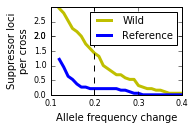

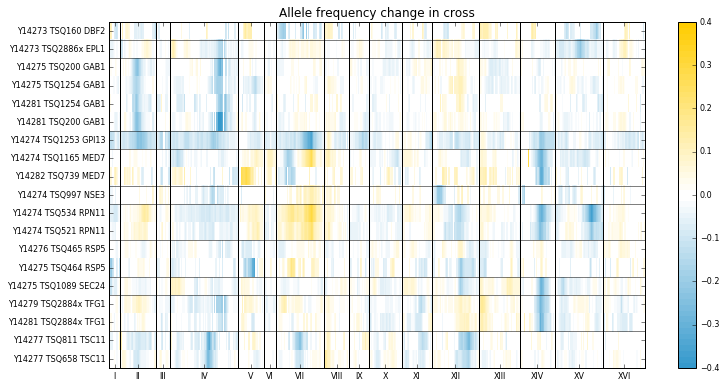

In [15]:
%run setup_qtl_analysis.py
print_paper_qtl_stats()
plot_qtl_summary_statistics(strong_qtl=0.2)
plot_combined_heatmap(control_only=False, good_only=True, sort_gene=True, filename="%s/4A_tsq_genesort.png"%DIR_PLOT, max_shown_signal=0.4)

### 2.2 Suppressor map reproducibility

Skipping QTL chrI 230168 (af change=-0.14) as too short (28)
Good total QTLs=56, correct sign in other replicate=56 (100%)
Total QTLs with one replicate bad=23, correct sign in other replicate=18 (78%)
Total QTLs with multiple queries=30, correct sign in other query=29 (96%)
Total QTLs with multiple strains per query=18, correct sign in other wild strain=18 (100%)


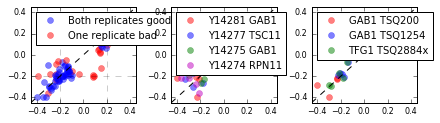

In [16]:
plot_paper_qtl_reproducibility()